In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline


from sklearn.cluster import DBSCAN
from collections import Counter
from scipy.spatial import distance

import sys
sys.path.append('../analysis/')
from csv_to_pandas import csv_into_dict_of_data
from constants import testing_dataset, training_dataset,validation_dataset
from plot_graph import remove_zero_columns
import sys
sys.path.append('../analysis/')
from kmeans_elbow import find_k_for_KMeans_elbow_method_sum_of_square_to_nearest_centroid, find_k_for_KMeans_elbow_method_score, plot_elbow

df_key = 'snmp'
epsilon = 10000
miniminum_points = 3
# print(testing_dataset, training_dataset,validation_dataset)

In [2]:
df_dict = csv_into_dict_of_data(training_dataset)
df_dict = remove_zero_columns(df_dict)
df_snmp_only = df_dict[df_key]

In [3]:
testing_df_dict = csv_into_dict_of_data(testing_dataset)
testing_df_dict = remove_zero_columns(testing_df_dict)
testing_df =  testing_df_dict[df_key]


In [4]:
# df_comb = pd.concat([df_snmp_only, testing_df], axis=1)

df_comb = df_snmp_only

In [5]:
val_dict = csv_into_dict_of_data(validation_dataset)
val_dict = remove_zero_columns(val_dict)
val_df = val_dict[df_key]

val_df = val_df.reindex(sorted(val_df.columns), axis = 1)

In [6]:
df_timeIndex = df_comb.reindex(sorted(df_comb.columns), axis = 1)
numOfTrainingSample = len( df_comb.columns )

date = ['2018-10-08','2018-12-31',  # 2 mondays
        '2018-12-25','2019-01-01',  # closest points
        '2019-01-24','2019-01-25', '2019-01-26','2019-01-27'  # 2 cluster vs 2 outlier
         
        ]

df_dateIndex = df_timeIndex.T 
# df_timeIndex

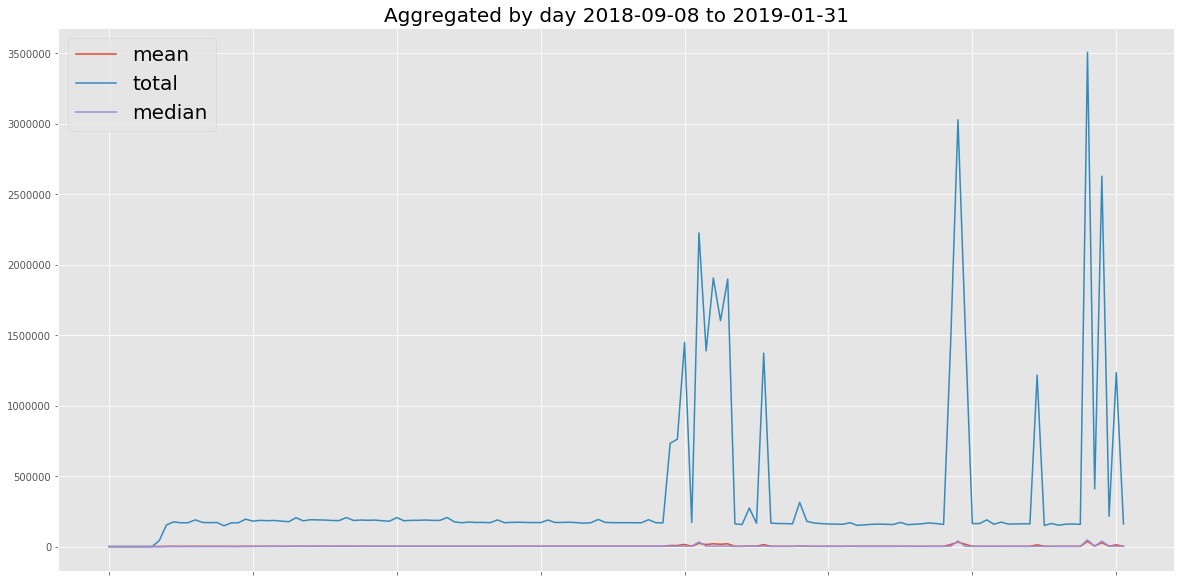

In [7]:
mean = df_timeIndex.mean()
total = df_timeIndex.sum()
median = df_timeIndex.median()

df = pd.concat([mean, total, median], axis=1 )
df.columns = ['mean', 'total', 'median']
df.plot(figsize = (20,10))
plt.legend(loc = 'upper left', fontsize = 20)
plt.title('Aggregated by day 2018-09-08 to 2019-01-31', fontsize=20)
plt.xlabel = "s"
# df
# total = total.sort_index
# sum.plot(figsize = (20,10))
# type(total)

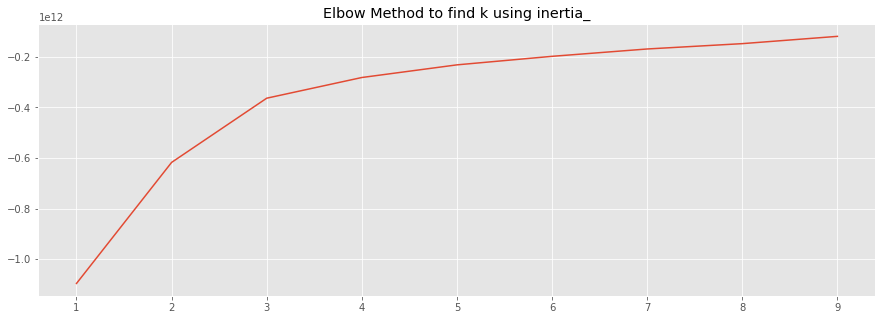

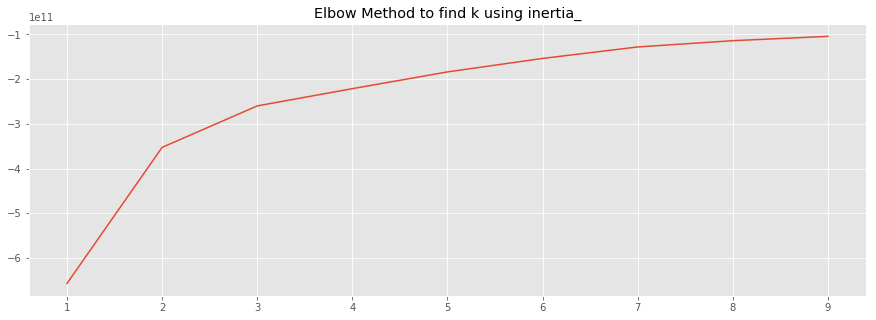

In [8]:
# df_timeIndex
score1 = find_k_for_KMeans_elbow_method_score(df_dateIndex)
plot_elbow(score1)

score = find_k_for_KMeans_elbow_method_score(df_timeIndex)
plot_elbow(score)

## DBSCAN

In [9]:
model = DBSCAN(eps = epsilon, min_samples = miniminum_points).fit(df_dateIndex)
clusters = Counter(model.labels_)
clusters

Counter({0: 7, -1: 25, 1: 98, 2: 12})

## "Normal" Traffic

Text(0.5, 1.0, 'snmp traffic with epsilon 10000 and min points 3\ntotal data points: 142\nnumber of clusters: 3\ntotal outlier: 25 ( 17.61%) excluded')

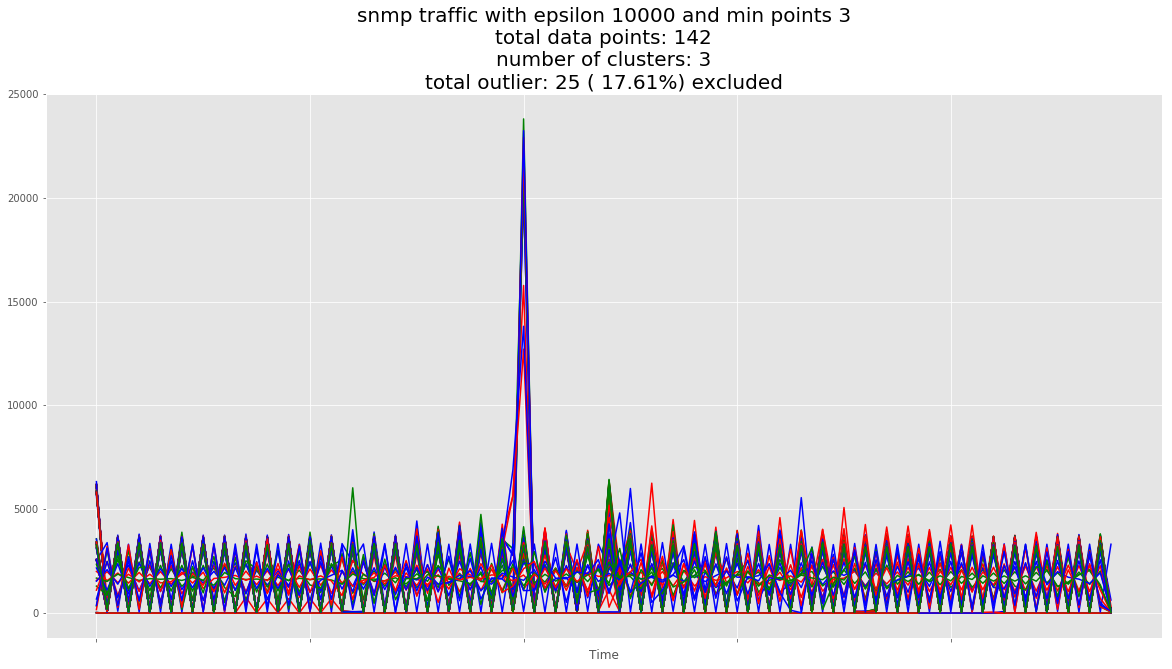

In [10]:
normal = df_dateIndex[model.labels_ != -1].T

normal.plot(legend = False, figsize = (20, 10), color = ['r', 'b', 'g'])
title = df_key +' traffic with epsilon ' + \
    str(epsilon) + ' and min points ' + str(miniminum_points) + '\n' + \
    'total data points: ' + str( numOfTrainingSample ) + '\n' + \
     'number of clusters: ' + str(len(clusters) - 1) + '\n' + \
    'total outlier: ' + str( clusters[-1] ) + \
    ' ( ' +  str( round(clusters[-1]  * 100.0 / numOfTrainingSample , 2)) + '%)' + ' excluded'

plt.title(title, fontsize=20)


## Cluster 0

Text(0.5, 1.0, 'Cluster 0: Failing at data collection (7)')

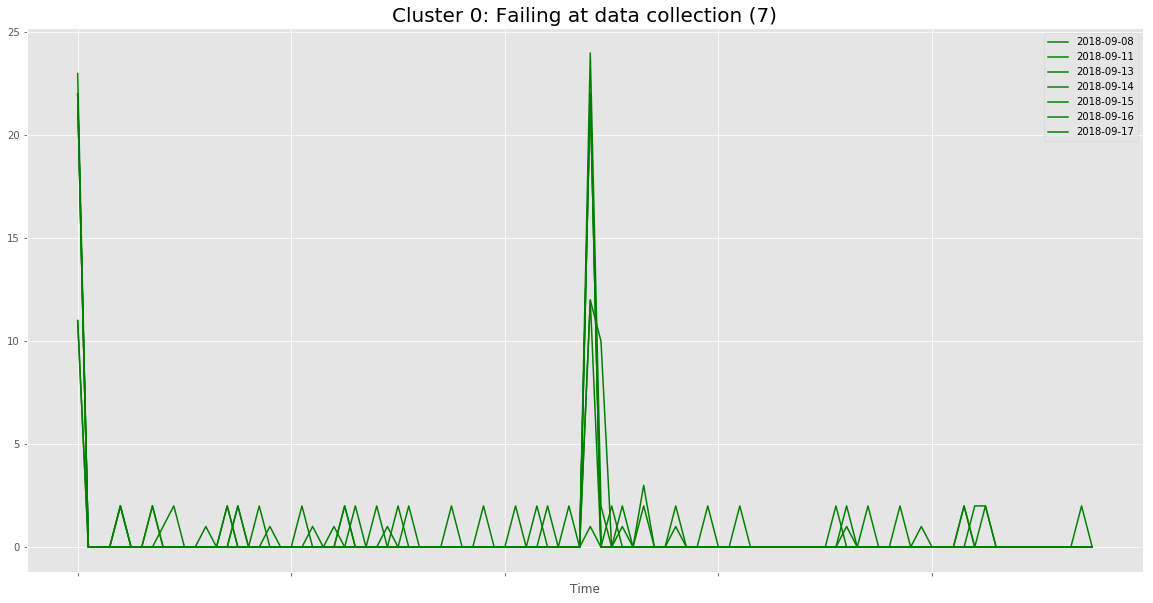

In [11]:
cluster0 = df_dateIndex[model.labels_ == 0].T

title0 = 'Cluster 0: Failing at data collection (' + str(len(cluster0.columns)) + ')' 
cluster0.plot( figsize = (20,10), color = 'g')
plt.title(title0, fontsize=20)

## Cluster 1

Text(0.5, 1.0, ' Cluster 1: First 12 Mondays??')

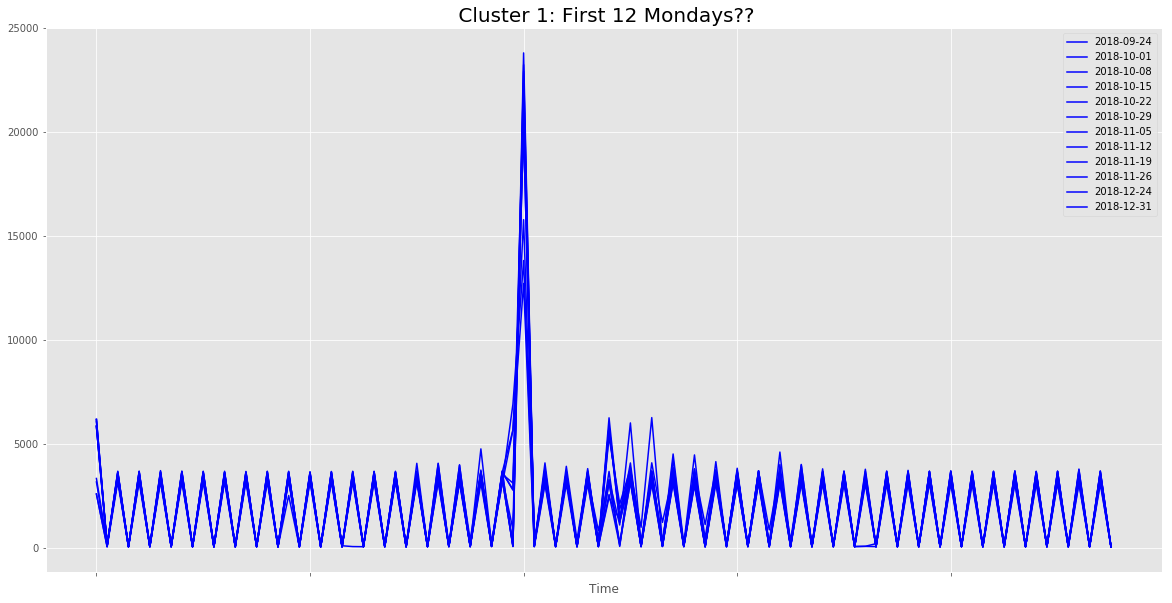

In [12]:
cluster2 = df_dateIndex[model.labels_ == 2].T
title2 = ' Cluster 1: First ' + str(len(cluster2.columns)) + ' Mondays??'

cluster2.plot(figsize = (20,10), color = 'b')
plt.title(title2, fontsize = 20)

## Cluster 3

Text(0.5, 1.0, 'Cluster 3: Majority (98 days / 69.01%) ')

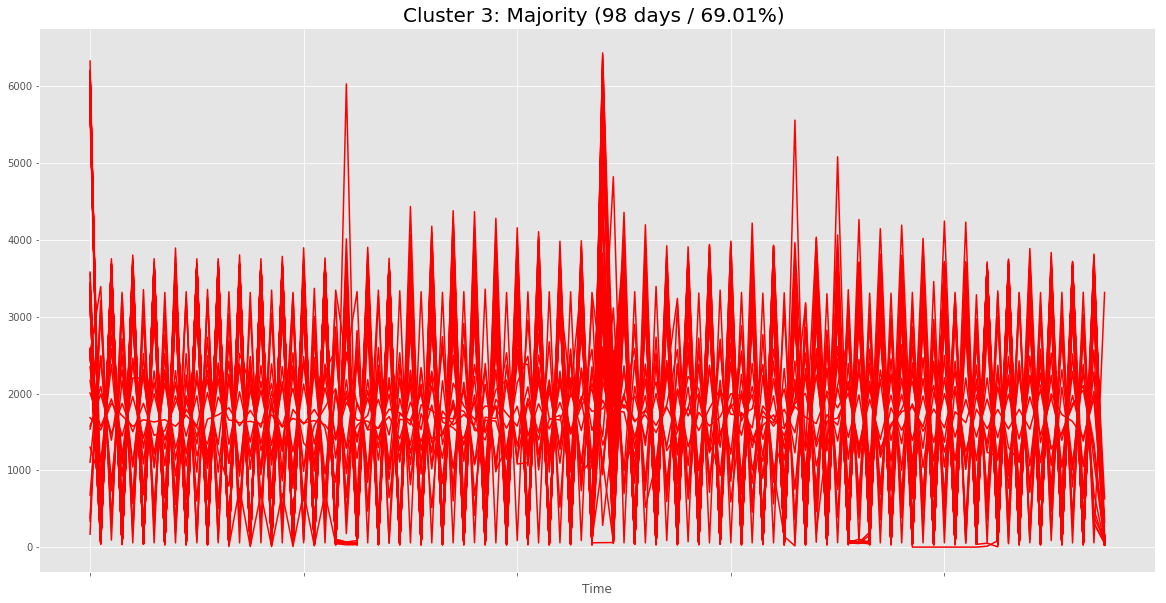

In [13]:
cluster1 = df_dateIndex[model.labels_ == 1].T
total = len(cluster1.columns)
title1 = 'Cluster 3: Majority (' + str(total) + ' days / ' +\
    str(round(total * 100.0 / numOfTrainingSample,2)) + '%) '

cluster1.plot(legend = False, figsize = (20,10), color = 'r')
plt.title(title1, fontsize = 20)


Text(0.5, 1.0, 'Jan 24th and 25th (Thursday and Friday) \n before outlier on 26th and 27th    \n Euclidean Distance between 2019-01-24 and 2019-01-24: \n6308.96')

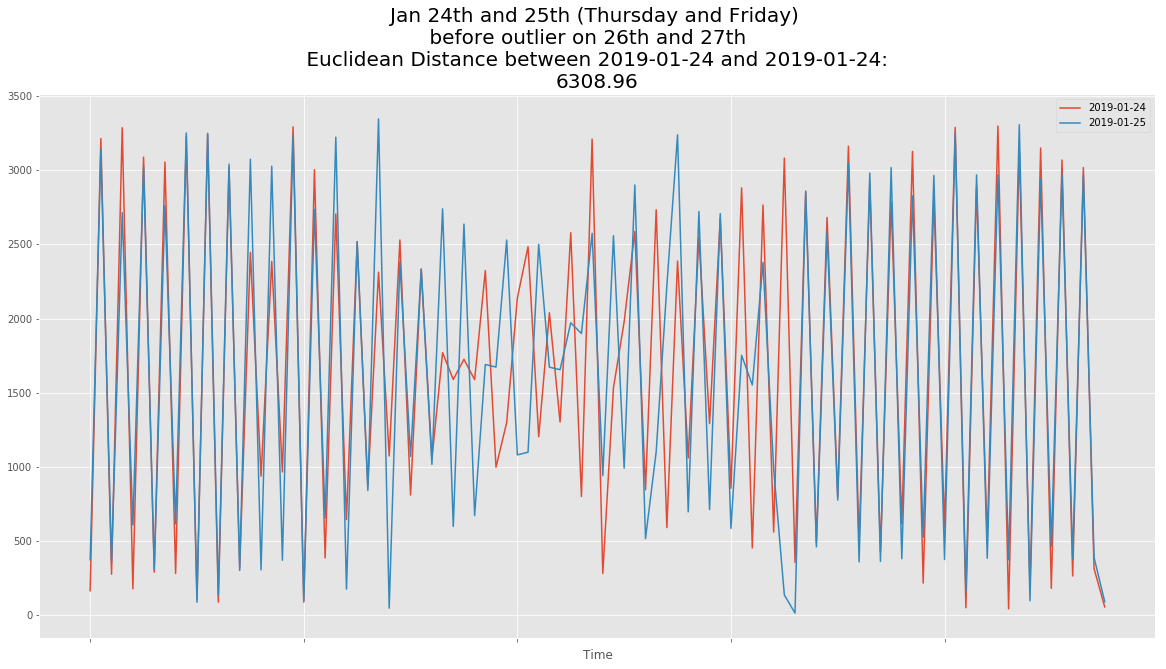

In [14]:
euclid = distance.euclidean(df_timeIndex[date[4]], df_timeIndex[date[5]])
title = 'Jan 24th and 25th (Thursday and Friday) \n before outlier on 26th and 27th\
    \n Euclidean Distance between ' + \
    date[4] + ' and '+ date[4] + ": \n"+ str(round(euclid,2))

df_timeIndex[[ date[4], date[5]]].plot(legend=True, figsize = (20, 10) )
plt.title(title, fontsize=20)

## Closest points

Text(0.5, 1.0, 'Christmas and New Year \n Euclidean Distance between 2018-12-25 and 2019-01-01: \n610.64')

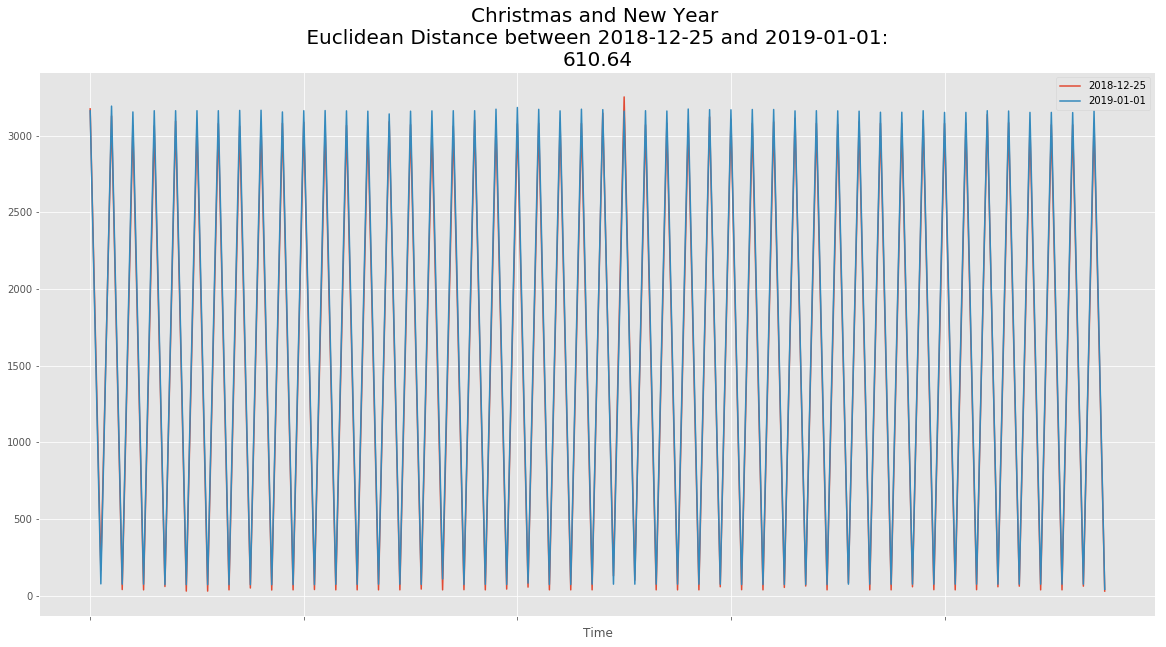

In [15]:
euclid = distance.euclidean(df_timeIndex[date[2]], df_timeIndex[date[3]])
title = 'Christmas and New Year \n Euclidean Distance between ' + \
    date[2] + ' and '+ date[3] + ": \n"+ str(round(euclid,2))

df_timeIndex[[ date[2], date[3]]].plot(legend=True, figsize = (20, 10) )
plt.title(title, fontsize=20)

# Outliers 

Text(0.5, 1.0, 'snmp traffic outlier (25 or 17.61%)')

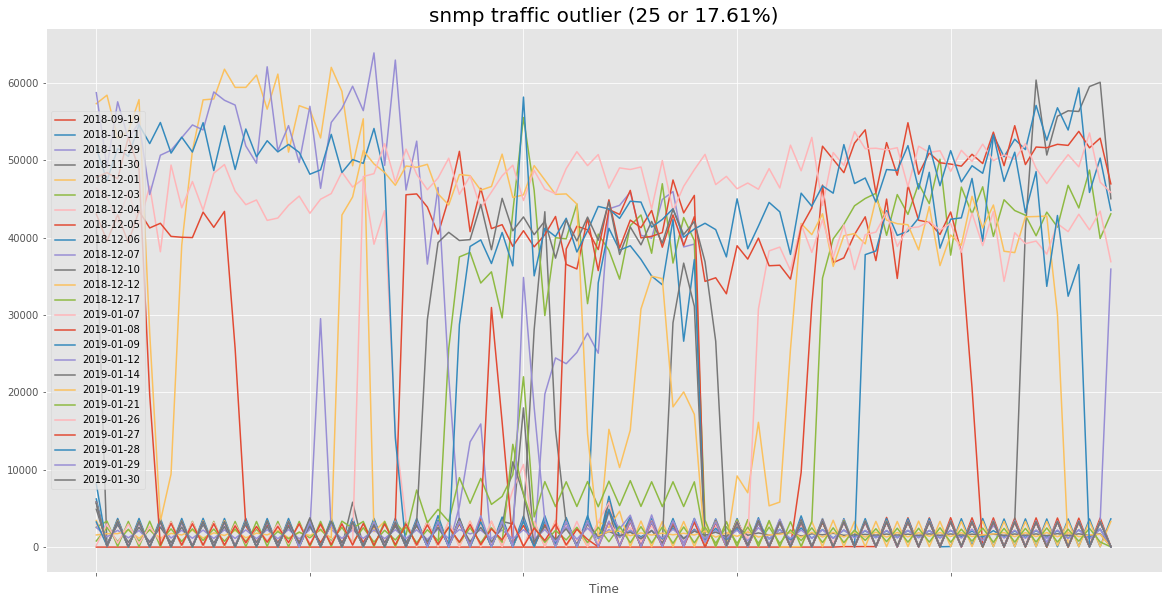

In [16]:
outlier = df_dateIndex[model.labels_ == -1].T

title_o = df_key + ' traffic outlier (' + str( len(outlier.columns ) ) +\
    ' or ' +  str( round(clusters[-1]  * 100.0 / numOfTrainingSample , 2)) + '%)'

outlier.plot(legend=True, figsize = (20, 10) )
plt.title(title_o, fontsize=20)

<h2><center>Outliers on Jan 26th and 27th compared to 24th and 25th!</center></h2>

Text(0.5, 1.0, 'outlier on Jan 26th vs  24th and 25th ')

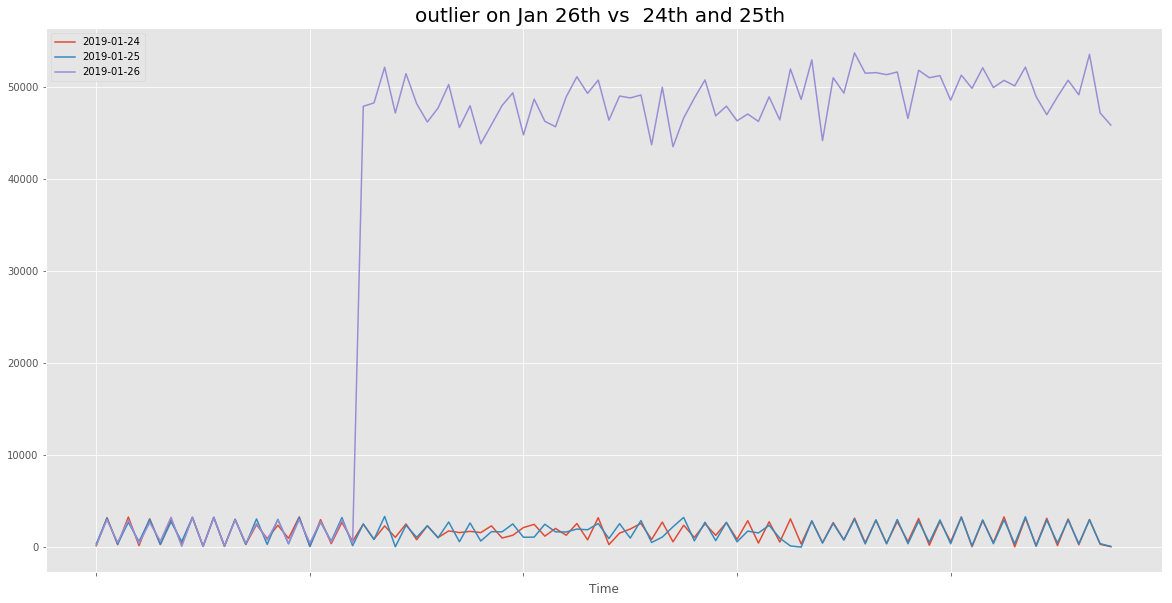

In [17]:
sample_df = df_timeIndex[[date[4],date[5],date[6] ]]

euclid = distance.euclidean(df_timeIndex[date[4]], df_timeIndex[date[6]])

title_s = 'outlier on Jan 26th vs  24th and 25th '# \n Euclidean Distance between ' + \
#      date[4] + ' (normal) \nand ' +\
#     date[6] + "(outlier) \n"+ str(round(euclid,2))

sample_df.plot(legend=True, figsize = (20, 10) )
plt.title(title_s, fontsize=20)


## 3000 per 15 minute vs 50000+
* easy outlier
* none of my IDS alerted me

## Outlier 2

61128.26781448988


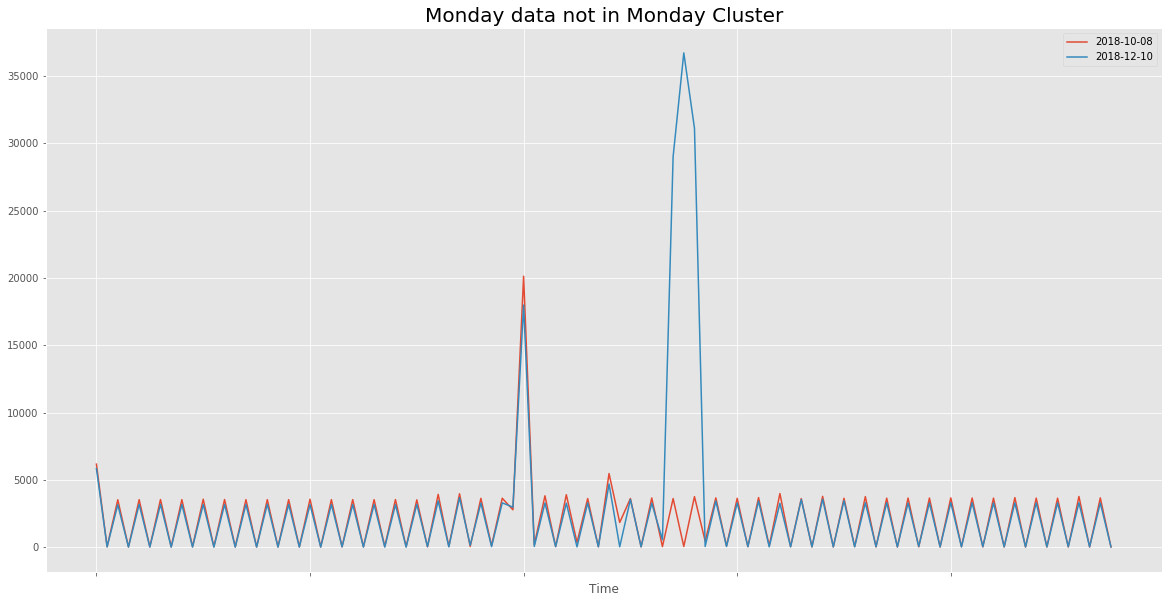

In [18]:
col = list(outlier.columns) ## 2018-10-11
date0 = date[0]
date1 = date[5]
date2 = '2018-12-10'

euclid = distance.euclidean(df_timeIndex[date1], df_timeIndex[date2])
title = 'Christmas and New Year \n Euclidean Distance between ' + \
     date0 + ' (normal) \nand ' +\
    date2 + "(outlier) \n"+ str(round(euclid,2))
                                                   
df_timeIndex[ [ date0,  date2 ]].plot(legend=True, figsize = (20, 10) )
plt.title('Monday data not in Monday Cluster', fontsize=20)
print(euclid)

## Dimensionality Reduction
* High co-relation
* loss of feature to trace back
* more importantly: more work for me and employee

In [19]:
start = 23
stop = 27
hourX_timeIndex = df_timeIndex.iloc[start:stop ]
hourX_dateIndex = hourX_timeIndex.T
# hourX_timeIndex.plot(legend=False, figsize = (20, 10) )
startTime = hourX_dateIndex.columns[0][ :5]
stopTime = hourX_dateIndex.columns[-1][ :5]
# startTime

In [20]:
# hourX_dateIndex.columns

In [21]:
epsilon1 = 600
miniminum_points1 = 3
model1 = DBSCAN(eps = epsilon1, min_samples = miniminum_points1).fit(hourX_dateIndex)
# hourOne_df
clusters = Counter(model1.labels_)

clusters

Counter({0: 8, 1: 10, 2: 98, -1: 17, 3: 5, 4: 4})

Text(0.5, 1.0, 'outlier:17 or 11.97%')

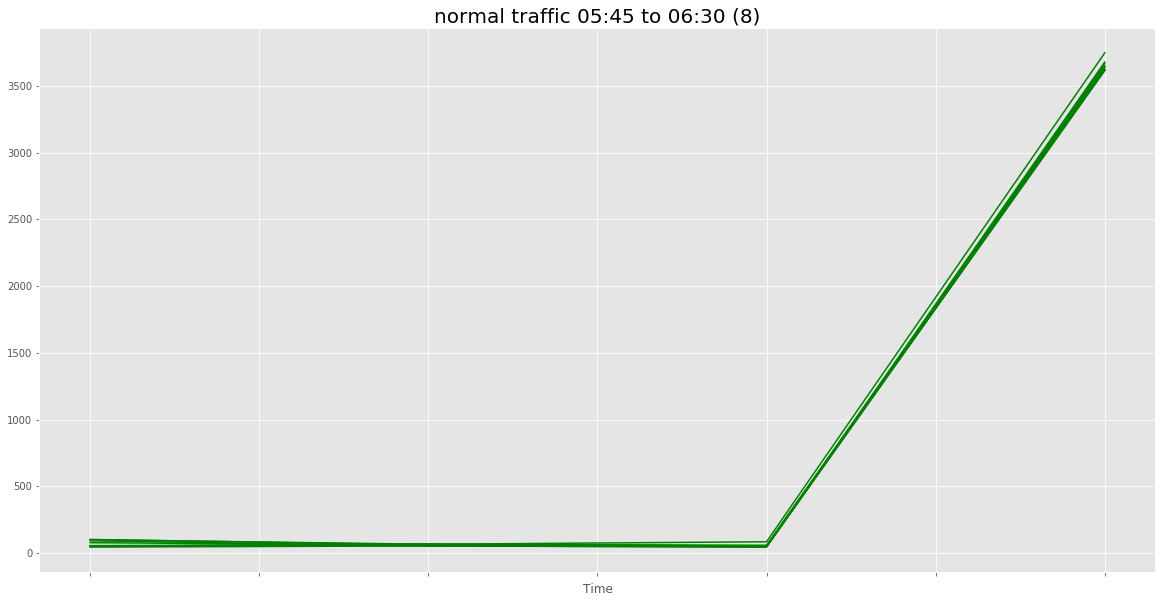

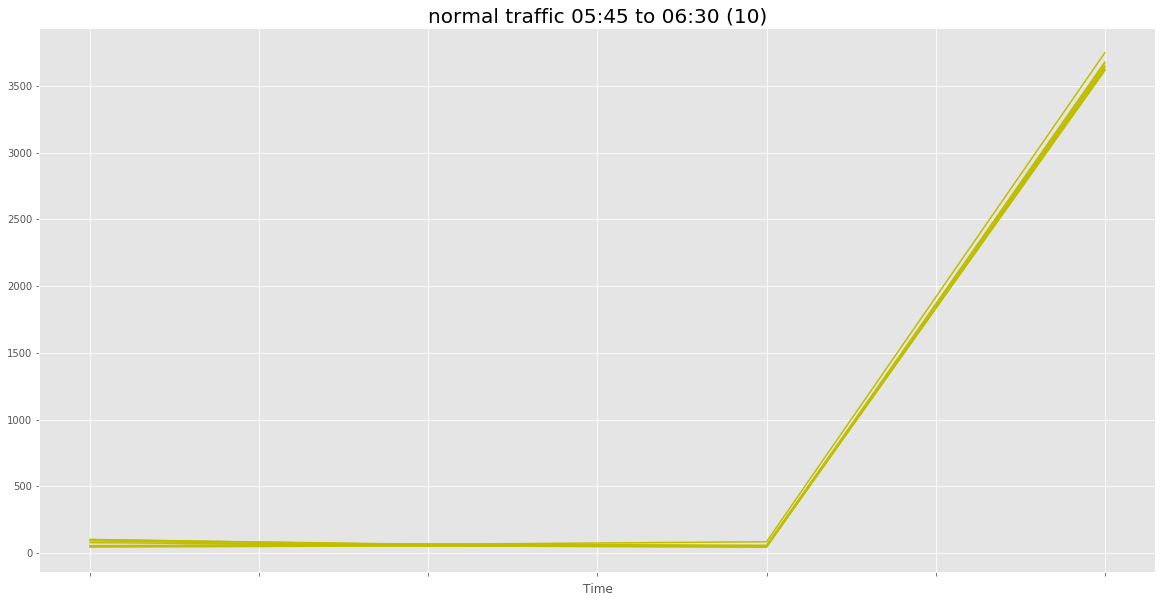

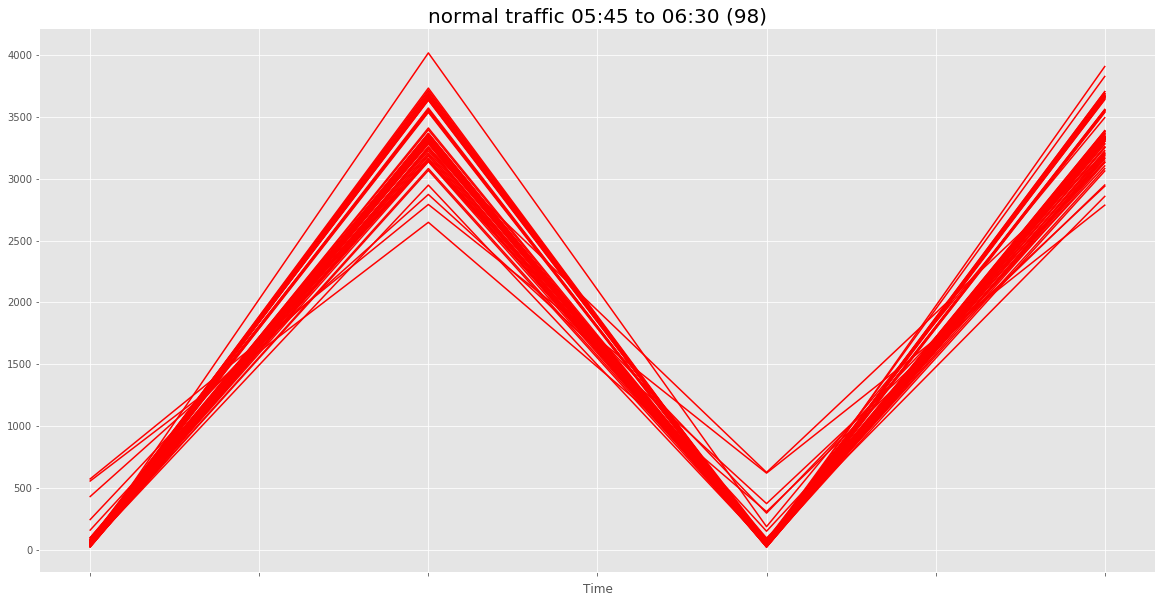

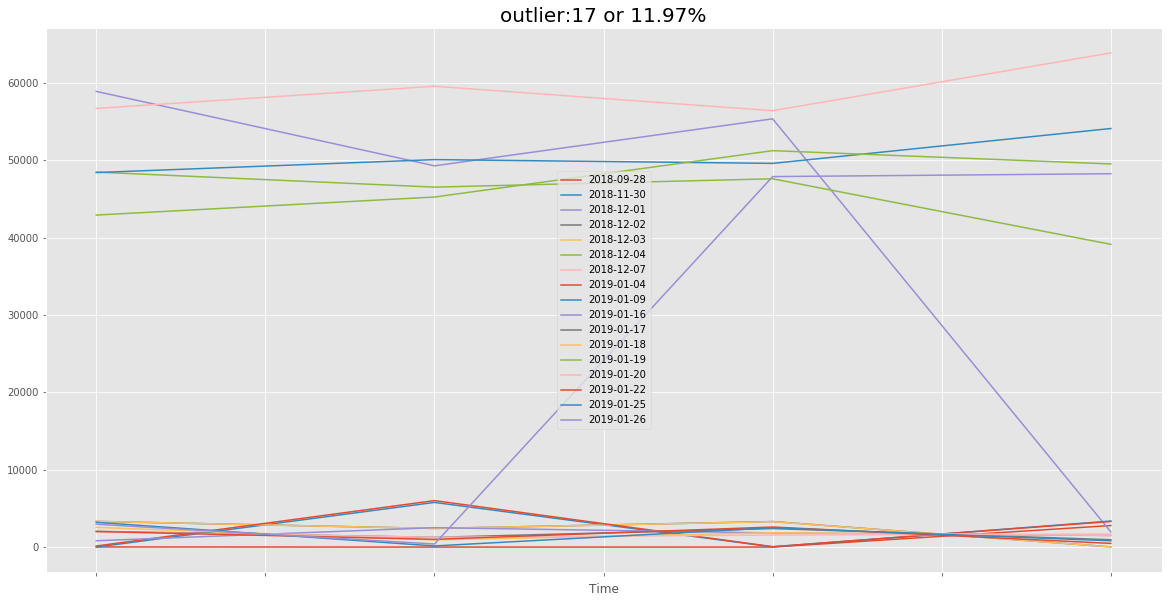

In [22]:
cluster0 = hourX_dateIndex[model1.labels_ == 0].T
cluster1 = hourX_dateIndex[model1.labels_ == 1].T
cluster2 = hourX_dateIndex[model1.labels_ == 2].T
cluster3 = hourX_dateIndex[model1.labels_ == 3].T
cluster4 = hourX_dateIndex[model1.labels_ == 4].T
# cluster5 = hourX_dateIndex[model1.labels_ == 5].T
# cluster6 = hourX_dateIndex[model1.labels_ == 6].T
# cluster6 = hourX_dateIndex[model1.labels_ == 6].T
clusterX = hourX_dateIndex[model1.labels_ == -1].T

title =  'normal traffic ' + startTime + ' to ' + stopTime +' (' + str(len(cluster0.columns)) + ')' 
cluster1.plot(legend=False, figsize = (20,10), color = 'g')
plt.title(title, fontsize=20)

title =  'normal traffic ' + startTime + ' to ' + stopTime +' (' + str(len(cluster1.columns)) + ')' 
cluster1.plot(legend=False, figsize = (20,10), color = 'y')
plt.title(title, fontsize=20)


title =  'normal traffic ' + startTime + ' to ' + stopTime +' (' + str(len(cluster2.columns)) + ')' 
cluster2.plot(legend=False, figsize = (20,10), color = 'r')
plt.title(title, fontsize=20)

title0 = 'outlier:' + str(len(clusterX.columns)) +\
     ' or ' +  str( round(clusters[-1]  * 100.0 / numOfTrainingSample , 2)) + '%'
clusterX.plot(legend=True, figsize = (20,10) )
plt.title(title0, fontsize=20)



Text(0.5, 1.0, '05:45 to 06:30')

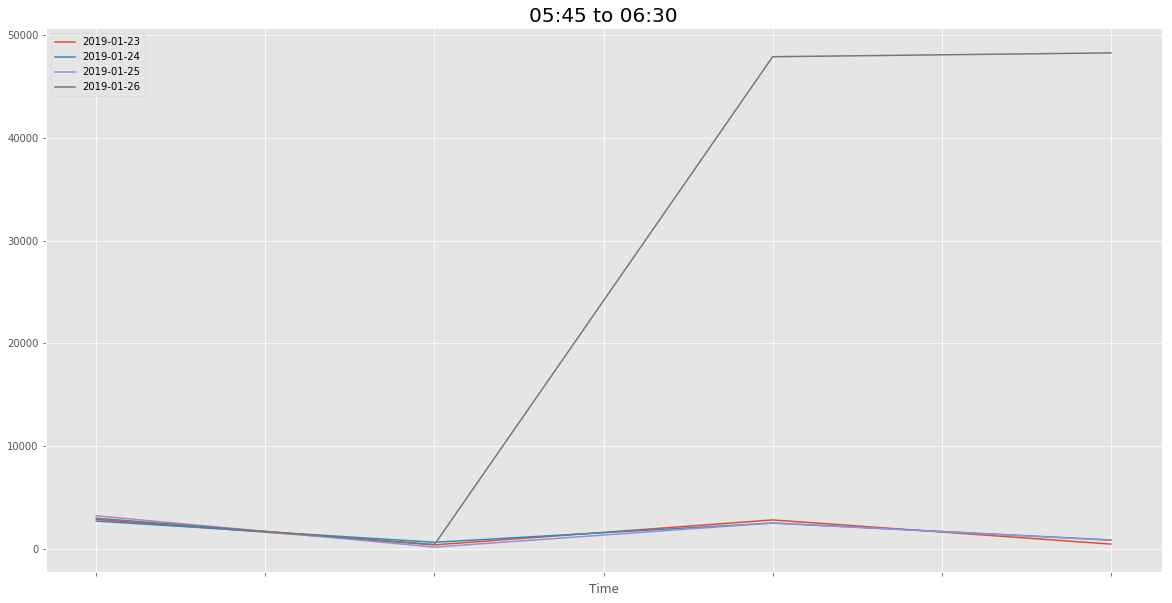

In [23]:
hourX_timeIndex[ ['2019-01-23','2019-01-24','2019-01-25','2019-01-26' ] ].plot(figsize = (20,10) )

title =  startTime + ' to ' + stopTime 
plt.title(title, fontsize=20)

In [24]:
df_timeIndex.head()

,2018-09-08,2018-09-11,2018-09-13,2018-09-14,2018-09-15,2018-09-16,2018-09-17,2018-09-19,2018-09-20,2018-09-21,...,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31
Time,,,,,,,,,,,,,,,,,,,,,
00:00:00,11.0,22.0,22.0,23.0,22.0,22.0,11.0,0.0,2585.0,2538,...,677,338,167,376,228,47763,3242,5741,5665,3279
00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,107,...,2485,3045,3214,3138,2992,48402,185,147,144,228
00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3756.0,3635,...,732,327,278,359,513,47610,3269,3336,3334,3374
00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,54,...,2508,3041,3287,2715,2978,52982,27,93,44,57
01:00:00,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,3755.0,3731,...,566,225,180,610,419,48799,3201,3275,3279,3331


In [25]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components=2)

pc = pca.fit_transform(df_timeIndex.T)
pc_df = pd.DataFrame(data = pc
             , columns = ['PC1', 'PC2'])
pc_df.head(3)
df_timeIndex.T

Time,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
2018-09-08,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-11,22.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-13,22.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-14,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2018-09-15,22.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-16,22.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-17,11.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3746.0,108.0,3773.0,60.0,3759.0,69.0,3739.0,155.0,3760.0,59.0
2018-09-20,2585.0,90.0,3756.0,55.0,3755.0,55.0,3756.0,75.0,3777.0,68.0,...,3641.0,59.0,3621.0,63.0,3644.0,68.0,3640.0,56.0,3633.0,54.0
2018-09-21,2538.0,107.0,3635.0,54.0,3731.0,101.0,3635.0,54.0,3635.0,100.0,...,3643.0,59.0,3623.0,51.0,3624.0,55.0,3619.0,47.0,3635.0,43.0


Text(0.5, 1.0, '2D principal component')

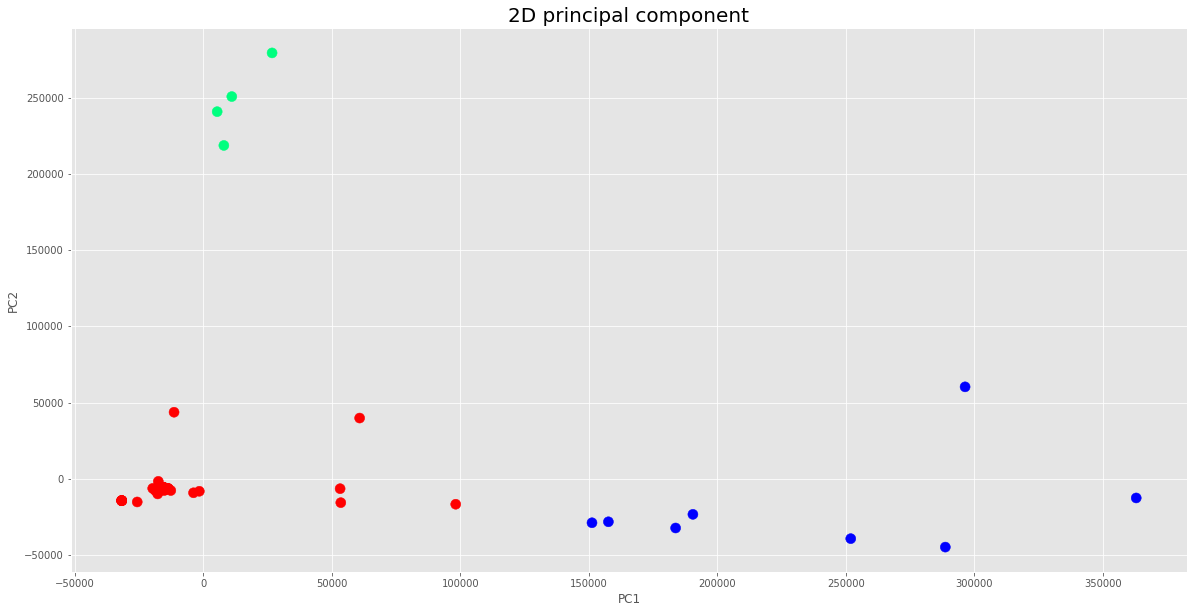

In [49]:
del label_color_map
from sklearn.cluster import KMeans
from constants import training_dataset, model_save_dir, wavelet_to_use, k_in_kmeans_before, label_color_map,plot_save_dir


num_clusters = 3

km = KMeans(n_clusters = num_clusters, init = 'k-means++', max_iter=300, random_state=0)
model = km.fit(pc_df)
labels = model.labels_

type(labels)

color_scheme = []


"""label into color"""
for label in labels:
    color_scheme.append(label_color_map[label]) 

color_scheme
"""count each color"""
custom_legend = Counter(color_scheme)


"""concatenate key and value of dict for legend"""
custom_legend = ','.join( key + ' (' + str(value) + ')' for key, value in custom_legend.items() ) 
custom_legend = custom_legend.split(",")

pc_df.plot(kind='scatter', x = 'PC1', y = 'PC2', figsize = (20,10),  s = 100, color = color_scheme)
plt.title('2D principal component', fontsize = 20)


In [50]:
label_color_map[-1] = 'black'
label_color_map[2] = 'springgreen'
label_color_map[3] = 'salmon'
label_color_map

{-1: 'black',
 0: 'red',
 1: 'blue',
 2: 'springgreen',
 3: 'salmon',
 4: 'cyan',
 5: 'magenta',
 6: 'yellow',
 7: 'orange',
 8: 'gold',
 9: 'salmon',
 10: 'pink',
 11: 'grey',
 12: 'lime',
 13: 'springgreen',
 14: 'maroon',
 15: 'royalblue',
 16: 'brown',
 17: 'coral',
 18: 'olive',
 19: 'lightgreen',
 20: 'slateblue',
 21: 'slategray',
 22: 'floralwhite',
 23: 'darkviolet',
 24: 'plum',
 25: 'deeppink',
 26: 'crimson',
 27: 'forestgreen'}

142
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', 'x', 'x', 'x', '.', 'x', 'x', 'x', 'x', 'x', '.', '.', '.', '.', 'x', '.', '.', '.', '.', 'x', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', 'x', 'x', 'x', '.', '.', '.', '.', '.', '.', '.', '.', '.', 'x', '.', '.', '.', '.', '.', '.', 'x', 'x', 'x', '.', 'x', '.']


Text(0.5, 1.0, '2D principal component \n18 of 142 or 12.68% outlier in black')

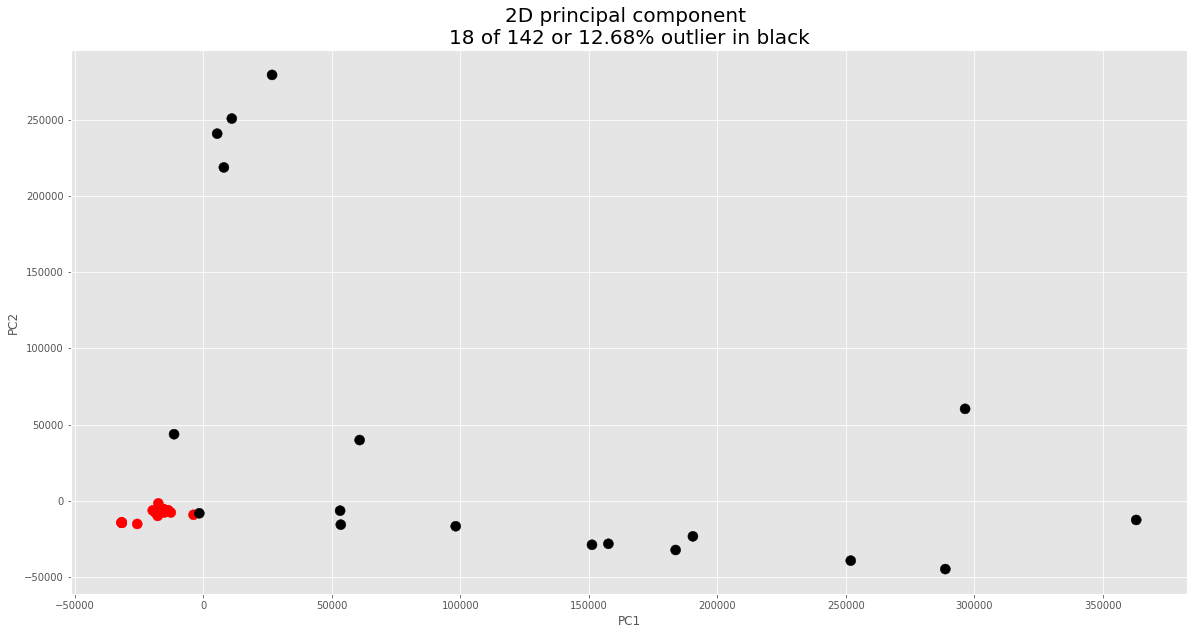

In [58]:
epislon = 500
miniminum_points = 8
model = DBSCAN(eps = epsilon, min_samples = miniminum_points).fit(pc_df)
clusters = Counter(model.labels_)
labels = model.labels_

print(len(labels))
color_scheme = []
marker_type = []

"""label into color"""
for label in labels:
    color_scheme.append(label_color_map[label]) 
    if label == -1:
        marker_type.append('x')
    else:
        marker_type.append('.')
        
print(marker_type)
# """count each color"""
custom_legend = Counter(color_scheme)

title = '2D principal component \n' +\
    str(clusters[-1]) + ' of ' + str( len(labels)) + ' or ' +\
   str( round(clusters[-1] * 100 / len(labels), 2) )+ '% outlier in black'

"""concatenate key and value of dict for legend"""
custom_legend = ','.join( key + ' (' + str(value) + ')' for key, value in custom_legend.items() ) 
custom_legend = custom_legend.split(",")

pc_df.plot(kind='scatter', x = 'PC1', y = 'PC2', figsize = (20,10),  s = 100, color = color_scheme)
plt.title(title, fontsize = 20)
